In [1]:
import numpy as np
import matplotlib.pyplot as plt

import dubins_dynamics
from dubins_dynamics import DubinsDynamics
from multi_agent_planner import MultiAgentPlanner

In [4]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_VEL_ANG_VEL)
planner = MultiAgentPlanner(dubins, num_timesteps=100)
deg2rad = np.pi/180
x0 = np.array([[0.0, 0.0, 0.0]])
xf = np.array([[5.0, 5.0, 2*np.pi/3]])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([1, np.inf])

planner.add_obstacle(np.array([2, .3]), .5)
planner.add_obstacle(np.array([5, 2]), .5)
planner.add_obstacle(np.array([3, 3]), .5)
planner.setup_min_time_opt(x0, xf, tf_guess=10.0)
planner.add_x_bounds(x_bounds)
planner.add_u_bounds(u_bounds)
planner.add_u_diff_bounds(u_diff_bounds)
planner.add_u0_constraint(u0)
planner.add_uf_constraint(uf)
x, u, tf = planner.solve_opt()
x = x[0]; u = u[0]
# x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)


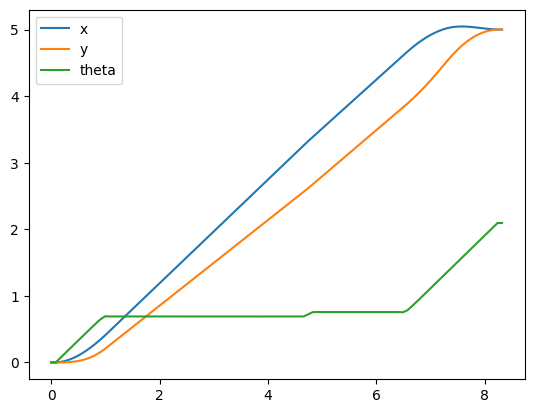

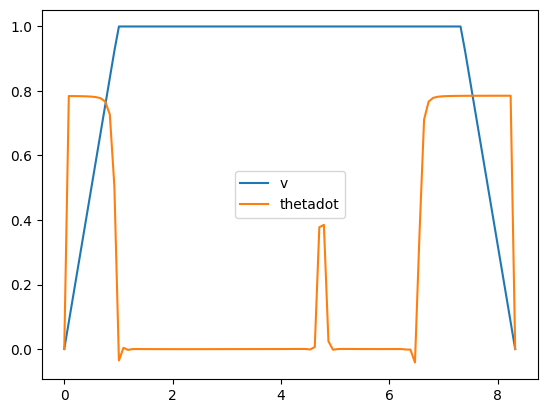

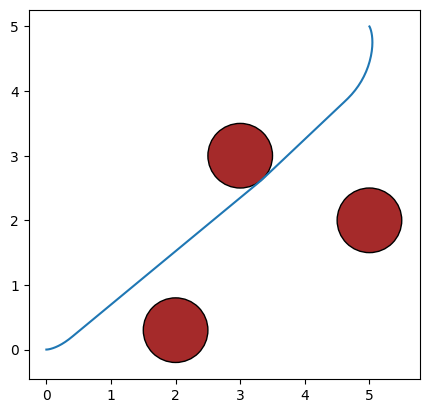

In [5]:
fig, ax = plt.subplots()
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[0,:])
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[1,:])
ax.plot(np.arange(x.shape[1])*tf/x.shape[1], x[2,:])
ax.legend(['x', 'y', 'theta'])

fig, ax = plt.subplots()
ax.plot(np.arange(u.shape[1])*tf/u.shape[1], u[0,:])
ax.plot(np.arange(u.shape[1])*tf/u.shape[1], u[1,:])
ax.legend(['v', 'thetadot'])

fig, ax = plt.subplots()
ax.plot(x[0,:], x[1,:])
for ob in planner.obstacles:
    ax.add_patch(plt.Circle(ob['position'], ob['radius'], facecolor='brown', edgecolor='k'))
ax.set_aspect('equal')

# 2 Rovers

In [2]:
dubins = DubinsDynamics()
planner = MultiAgentPlanner(dubins, 2, 100)
deg2rad = np.pi/180
x0 = np.array([[0.0, 0.0, np.pi/4],
               [5.0, 5.0, 5*np.pi/4]])
xf = np.array([[5.0, 5.0, np.pi/4],
              [0.0, 0.0, 5*np.pi/4]])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([1, np.inf])

# x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)
planner.setup_min_time_opt(x0, xf, tf_guess=10.0, x_bounds=x_bounds, u_bounds=u_bounds)
planner.add_u0_constraint(u0=u0) 
planner.add_uf_constraint(uf=uf) 
# planner.add_x_bounds(x_bounds=x_bounds)
# planner.add_u_bounds(u_bounds=u_bounds) 
planner.add_u_diff_bounds(u_diff_bounds=u_diff_bounds)
planner.opti.subject_to(planner.tf > 1.0)
x, u, tf = planner.solve_opt()

8.227748419798678


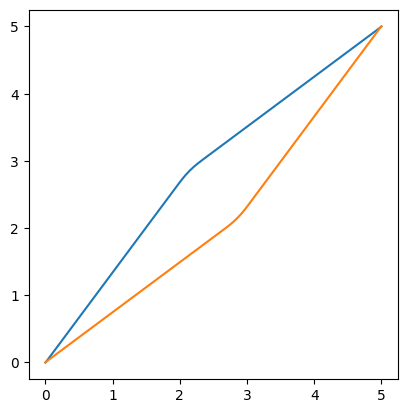

In [3]:
x = [[], []]
x[0] = planner.opti.debug.value(planner.x[0])
x[1] = planner.opti.debug.value(planner.x[1])
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

# 3 Rovers

In [7]:
dubins = DubinsDynamics()
planner = MAP(dubins, 3, 100)
deg2rad = np.pi/180
x0 = np.array([[0.0, 0.0, np.pi/4],
               [5.0, 5.0, 5*np.pi/4],
               [2, 0, 0]])
xf = np.array([[5.0, 5.0, np.pi/4],
              [0.0, 0.0, 5*np.pi/4],
              [2, 5, 0]])
u0 = np.zeros(2)
uf = np.zeros(2)
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-1, 1.],
    [-45*deg2rad, 45*deg2rad]
])
u_diff_bounds = np.array([10, np.inf])

x, u, tf = planner.solve_min_time(x0, xf, u0=u0, uf=uf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)
# x, u, tf = planner.solve_min_time(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)

10.245020659280952


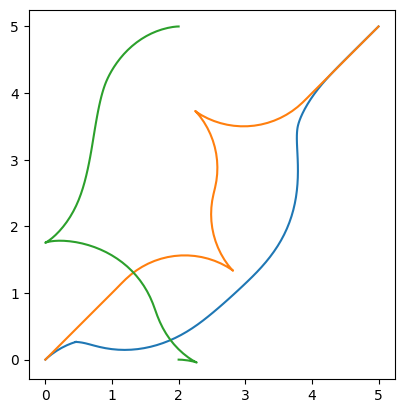

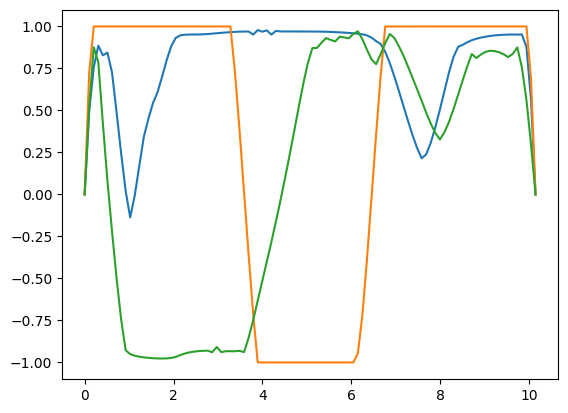

In [8]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(np.arange(u[i].shape[1])*tf/u[i].shape[1], u[i][0,:])

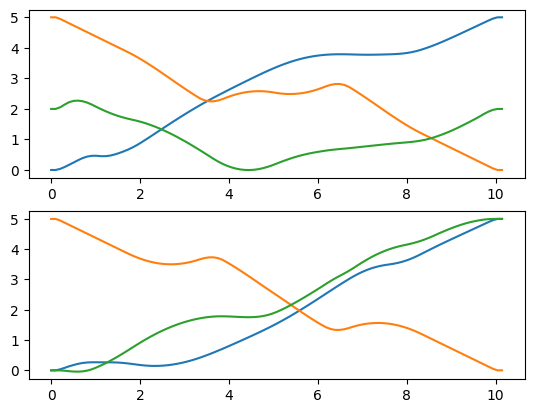

In [10]:
fig, ax = plt.subplots(2,1)
for i in range(planner.M):
    ax[0].plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][0,:])

for i in range(planner.M):
    ax[1].plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][1,:])

# Control Acceleration

In [2]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
deg2rad = np.pi/180
x_bounds = np.array([
    [-10., 10.],
    [-10., 10.],
    [-1., 1.],
    [-np.inf, np.inf]
])
u_bounds = np.array([
    [-5, 5.],
    [-45*deg2rad, 45*deg2rad]
])

In [4]:
planner = MultiAgentPlanner(dubins, num_agents=2, num_timesteps=100)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4]])


planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()
# x, u, tf = planner.solve_min_time(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds, u_diff_bounds=u_diff_bounds)

7.350236629714803


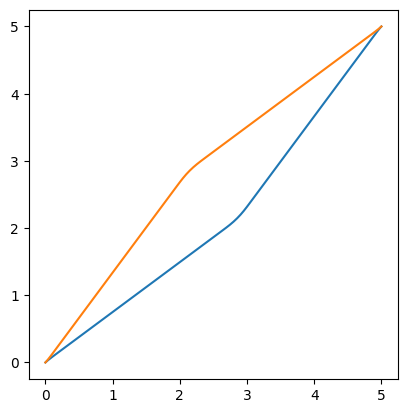

In [5]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

In [6]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentPlanner(dubins, num_agents=3, num_timesteps=100)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
x, u, tf = planner.solve_opt()


8.260143273238059


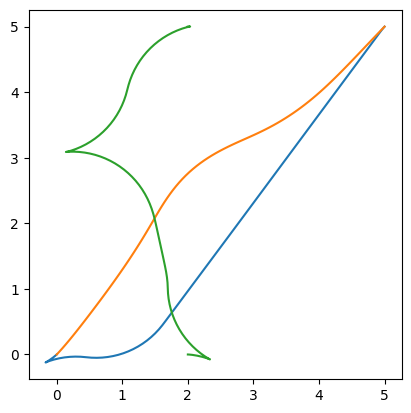

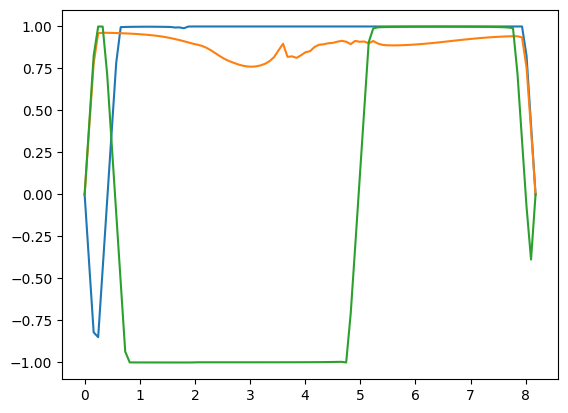

In [7]:
fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(x[i][0,:], x[i][1,:])
ax.set_aspect('equal')
print(tf)

fig, ax = plt.subplots()
for i in range(planner.M):
    ax.plot(np.arange(x[i].shape[1])*tf/x[i].shape[1], x[i][2,:])

In [5]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentPlanner(dubins, num_timesteps=100)
planner.add_obstacle(np.array([2, 2]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0)
x, u, tf = planner.solve_opt()
# planner.solve_min_time(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)

7.352485425806624


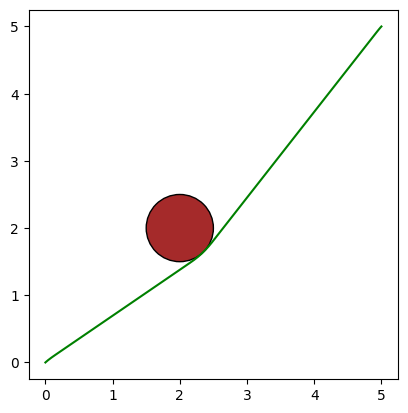

In [7]:
# planner.x_sol = [0]; planner.u_sol = [0]
# planner.x_sol[0] = planner.opti.debug.value(planner.x[0])
# planner.u_sol[0] = planner.opti.debug.value(planner.u[0])
# planner.tf_sol = planner.opti.debug.value(planner.tf)
print(planner.tf_sol)
fig, ax = planner.draw_path()

In [9]:
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4],
               [5.0, 5.0, 0.0, 5*np.pi/4],
               [2, 0, 0, 0]])
xf = np.array([[5.0, 5.0, 0.0, np.pi/4],
              [0.0, 0.0, 0.0, 5*np.pi/4],
              [2, 5, 0, 0]])
planner = MultiAgentPlanner(dubins, num_agents=3, num_timesteps=100)
planner.add_obstacle(np.array([2, 2]), .5)
planner.setup_min_time_opt(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)
planner.opti.subject_to(planner.tf > 1.0)
x, u, tf = planner.solve_opt()
# x, u, tf = planner.solve_min_time(x0, xf, x_bounds=x_bounds, u_bounds=u_bounds)

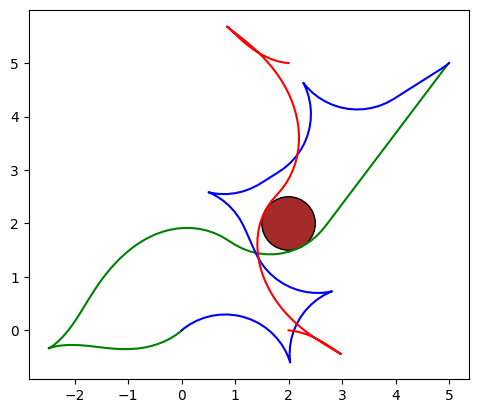

In [10]:
fig, ax = planner.draw_path()


In [3]:
dubins = DubinsDynamics(control=dubins_dynamics.CONTROL_LIN_ACC_ANG_VEL)
x0 = np.array([[0.0, 0.0, 0.0, np.pi/4]])
xf = np.array([[1.0, 0.0, 0.5, -np.pi/4]])
tf = 5.0
planner = MultiAgentPlanner(dubins, num_agents=1, num_timesteps=10)

N = 100
import time
t_start = time.time()
for i in range(N):
    planner.setup_mpc_opt(x0, xf, tf, x_bounds=x_bounds, u_bounds=u_bounds)
    x, u, tf = planner.solve_opt()
    # x, u, tf = planner.mpc(x0, xf, tf, x_bounds=x_bounds, u_bounds=u_bounds)
t_end = time.time()
print(f'total time: {t_end-t_start}')
print(f'avg time: {(t_end-t_start)/N}')

total time: 3.558022975921631
avg time: 0.035580229759216306


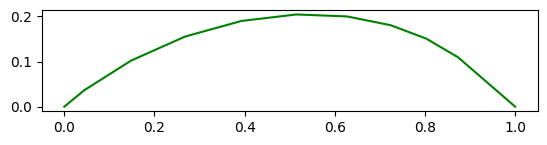

In [4]:
fig, ax = planner.draw_path()
